<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Walk_vs_Run_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [51]:
!kaggle datasets download -d huan9huan/walk-or-run

walk-or-run.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
import zipfile
zip_ref = zipfile.ZipFile('/content/walk-or-run.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import optimizers, losses
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [54]:
train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/walk_or_run_train/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_df = keras.utils.image_dataset_from_directory(
    directory = '/content/walk_or_run_test/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 600 files belonging to 2 classes.
Found 141 files belonging to 2 classes.


In [55]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [133]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (256, 256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.01))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.01))

model.add(Conv2D(filters = 8, kernel_size = (1,1),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 8, kernel_size = (1,1),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.01))

model.add(Flatten())

model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.01))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.01))
model.add(Dense(1, activation = "sigmoid"))

In [134]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 conv2d_39 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 64, 64, 16)      

In [135]:
from tensorflow.keras.optimizers import RMSprop,Adam

# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06, decay=0.0)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [136]:
history = model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
19/19 [==============================] - 3s 88ms/step - loss: 0.6951 - accuracy: 0.5017 - val_loss: 0.6918 - val_accuracy: 0.5957
Epoch 2/10
19/19 [==============================] - 2s 78ms/step - loss: 0.6848 - accuracy: 0.5817 - val_loss: 0.6613 - val_accuracy: 0.5816
Epoch 3/10
19/19 [==============================] - 2s 79ms/step - loss: 0.6841 - accuracy: 0.5483 - val_loss: 0.6778 - val_accuracy: 0.6241
Epoch 4/10
19/19 [==============================] - 2s 79ms/step - loss: 0.6736 - accuracy: 0.5933 - val_loss: 0.6632 - val_accuracy: 0.6383
Epoch 5/10
19/19 [==============================] - 2s 81ms/step - loss: 0.6592 - accuracy: 0.6217 - val_loss: 0.6659 - val_accuracy: 0.5674
Epoch 6/10
19/19 [==============================] - 2s 80ms/step - loss: 0.6646 - accuracy: 0.6067 - val_loss: 0.6462 - val_accuracy: 0.6667
Epoch 7/10
19/19 [==============================] - 2s 78ms/step - loss: 0.6443 - accuracy: 0.6417 - val_loss: 0.6445 - val_accuracy: 0.6099
Epoch 8/10
19

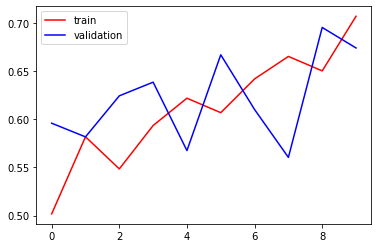

In [137]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

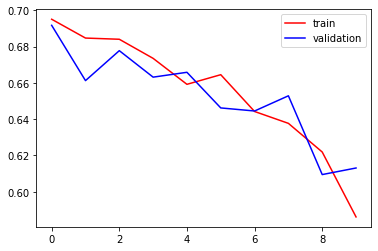

In [138]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [139]:
import cv2

In [164]:
test_img = cv2.imread('/content/run2.webp')

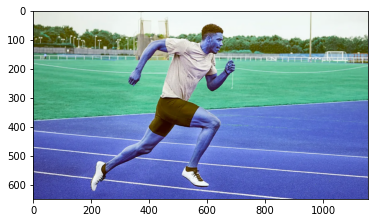

In [165]:
plt.imshow(test_img)

In [166]:
test_img.shape

(648, 1155, 3)

In [167]:
test_img = cv2.resize(test_img,(256,256))

In [168]:
test_input = test_img.reshape((1,256,256,3))

Walk--0

Run--1

In [169]:
y_pred = model.predict(test_input)

In [170]:
np.rint(y_pred)

array([[1.]], dtype=float32)

Path of the image to be predicted: /content/run2.webp


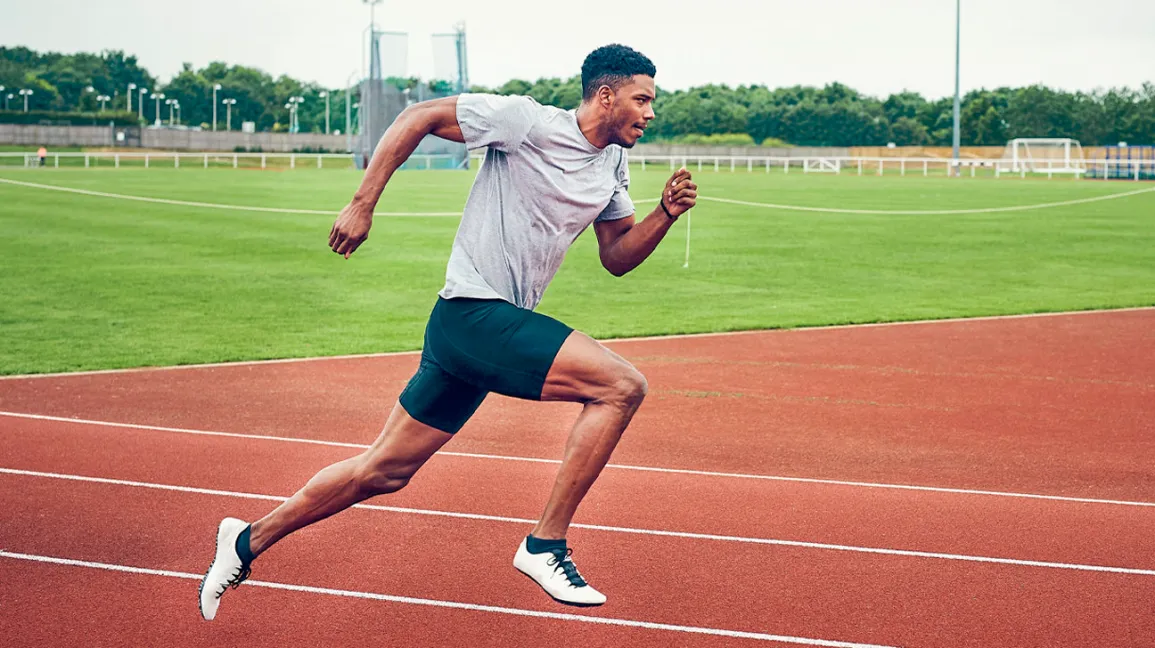

The image represents a Run


In [149]:
from google.colab.patches import cv2_imshow 
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

y_pred = model.predict(test_input)

y_pred = np.rint(y_pred)

if y_pred.any() == 0:
  print('The image represents a Walk')

else:
  print('The image represents a Run')